# 1 Import Libraries



In [46]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import to_datetime
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# 2 Load Data

Mount Google Drive

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Dataset

In [48]:
# Ganti path file dengan path yang sesuai
file_path = "/content/drive/MyDrive/Colab Notebooks/electricity/MBC GO Energy Consumption Milestone 2.csv"
# Baca file CSV ke dalam DataFrame tanpa menggunakan baris pertama sebagai nama kolom
df = pd.read_csv(file_path, header=0)

# Ubah kolom 'Units' menjadi kategori
categories = ['Fahren', 'RH', 'kWh', 'kVARh', 'Power Factor']
df['Units'] = pd.Categorical(df['Units'], categories=categories, ordered=True)

# Drop kolom yang tidak diperlukan
columns_to_drop = ['Channel', 'day_energy', 'SUM']
df = df.drop(columns=columns_to_drop)

# Tampilkan DataFrame hasil
print(df)

         Account                        Date  year  month  day   Units   0:00  \
0     6930212101     Monday, January 1, 2018  2018      1    1  Fahren  -5.80   
1     6930212101     Monday, January 1, 2018  2018      1    1      RH  91.58   
2     6930212101     Monday, January 1, 2018  2018      1    1     kWh    NaN   
3     6930212101     Monday, January 1, 2018  2018      1    1   kVARh    NaN   
4     6930212101     Monday, January 1, 2018  2018      1    1     kWh    NaN   
...          ...                         ...   ...    ...  ...     ...    ...   
7120  6930212101  Thursday, January 10, 2019  2019      1   10   kVARh    NaN   
7121  6930212101  Thursday, January 10, 2019  2019      1   10     kWh    NaN   
7122  6930212101  Thursday, January 10, 2019  2019      1   10   kVARh    NaN   
7123  6930212101  Thursday, January 10, 2019  2019      1   10     kWh    NaN   
7124  6930212101  Thursday, January 10, 2019  2019      1   10   kVARh    NaN   

       1:00   2:00   3:00  

# 3 Pre-Processing Data

In [49]:
df.head()

,Account,Date,year,month,day,Units,0:00,1:00,2:00,3:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
0,6930212101,"Monday, January 1, 2018",2018,1,1,Fahren,-5.80,1.40,1.40,1.40,...,3.20,3.20,1.40,-0.40,1.40,-4.00,-5.80,-5.80,-4.00,-5.80
1,6930212101,"Monday, January 1, 2018",2018,1,1,RH,91.58,91.87,91.87,91.87,...,77.53,71.11,64.92,64.66,70.89,70.21,76.61,76.61,70.21,76.61
2,6930212101,"Monday, January 1, 2018",2018,1,1,kWh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6930212101,"Monday, January 1, 2018",2018,1,1,kVARh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6930212101,"Monday, January 1, 2018",2018,1,1,kWh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df['Date'] = pd.to_datetime(df['Date'], format="%A, %B %d, %Y")

# Ubah kolom 'Date' menjadi waktu Unix
df['Date_unix'] = df['Date'].astype(int) / 10**9  # Konversi nanosecond ke second

# Tampilkan DataFrame hasil
df.head()

,Account,Date,year,month,day,Units,0:00,1:00,2:00,3:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,Date_unix
0,6930212101,2018-01-01,2018,1,1,Fahren,-5.80,1.40,1.40,1.40,...,3.20,1.40,-0.40,1.40,-4.00,-5.80,-5.80,-4.00,-5.80,1.514765e+09
1,6930212101,2018-01-01,2018,1,1,RH,91.58,91.87,91.87,91.87,...,71.11,64.92,64.66,70.89,70.21,76.61,76.61,70.21,76.61,1.514765e+09
2,6930212101,2018-01-01,2018,1,1,kWh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.514765e+09
3,6930212101,2018-01-01,2018,1,1,kVARh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.514765e+09
4,6930212101,2018-01-01,2018,1,1,kWh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.514765e+09


In [51]:
df_kWh = df[df['Units'] == 'kWh']
#df_kWh = df_kWh.drop(columns="Date_unix")
# Tampilkan DataFrame hasil
df_kWh.head()

,Account,Date,year,month,day,Units,0:00,1:00,2:00,3:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,Date_unix
2,6930212101,2018-01-01,2018,1,1,kWh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.514765e+09
4,6930212101,2018-01-01,2018,1,1,kWh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.514765e+09
7,6930212101,2018-01-01,2018,1,1,kWh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.514765e+09
9,6930212101,2018-01-01,2018,1,1,kWh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.514765e+09
11,6930212101,2018-01-01,2018,1,1,kWh,2872.8,2894.4,2887.2,2815.2,...,2959.2,2944.8,2901.6,2980.8,3002.4,2937.6,2944.8,3009.6,2959.2,1.514765e+09


In [52]:
# Isi nilai NaN dengan 0 pada kolom waktu
columns_waktu = ['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']
df_kWh[columns_waktu] = df_kWh[columns_waktu].fillna(0)

# Drop baris yang semua kolom waktu bernilai 0
df_kWh = df_kWh[df_kWh[columns_waktu].sum(axis=1) != 0]

# Tampilkan DataFrame hasil
df_kWh.head(10)

<ipython-input-52-fb88b563755a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kWh[columns_waktu] = df_kWh[columns_waktu].fillna(0)


,Account,Date,year,month,day,Units,0:00,1:00,2:00,3:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,Date_unix
11,6930212101,2018-01-01,2018,1,1,kWh,2872.8,2894.4,2887.2,2815.2,...,2959.2,2944.8,2901.6,2980.8,3002.4,2937.6,2944.8,3009.6,2959.2,1.514765e+09
13,6930212101,2018-01-01,2018,1,1,kWh,1612.8,1612.8,1598.4,1598.4,...,1612.8,1605.6,1612.8,1605.6,1605.6,1584.0,1548.0,1569.6,1562.4,1.514765e+09
30,6930212101,2018-01-02,2018,1,2,kWh,2800.8,2757.6,2599.2,2728.8,...,3585.6,3686.4,3657.6,3513.6,3412.8,3312.0,3326.4,3340.8,3312.0,1.514851e+09
32,6930212101,2018-01-02,2018,1,2,kWh,1526.4,1756.8,1994.4,1936.8,...,3074.4,2980.8,3369.6,2548.8,2073.6,2016.0,1879.2,1987.2,2016.0,1.514851e+09
49,6930212101,2018-01-03,2018,1,3,kWh,3297.6,3319.2,3319.2,3218.4,...,3859.2,3823.2,3708.0,3571.2,3420.0,3362.4,3297.6,3398.4,3484.8,1.514938e+09
51,6930212101,2018-01-03,2018,1,3,kWh,1972.8,1936.8,1900.8,1900.8,...,2844.0,2750.4,2620.8,2390.4,2246.4,2174.4,2066.4,2138.4,2188.8,1.514938e+09
68,6930212101,2018-01-04,2018,1,4,kWh,3391.2,3319.2,3297.6,3348.0,...,3873.6,3772.8,3780.0,3614.4,3427.2,3376.8,3283.2,3333.6,3420.0,1.515024e+09
70,6930212101,2018-01-04,2018,1,4,kWh,2037.6,1951.2,1972.8,1958.4,...,2908.8,2829.6,2620.8,2383.2,2268.0,2203.2,2102.4,2181.6,2210.4,1.515024e+09
87,6930212101,2018-01-05,2018,1,5,kWh,3340.8,3333.6,3290.4,3283.2,...,3830.4,3729.6,3556.8,3189.6,3016.8,3045.6,2937.6,2959.2,3016.8,1.515110e+09
89,6930212101,2018-01-05,2018,1,5,kWh,2095.2,2073.6,2059.2,2037.6,...,2901.6,2815.2,2592.0,2080.8,1965.6,1965.6,1836.0,1872.0,2124.0,1.515110e+09


In [53]:
# Konversi kolom 'Date' ke format datetime
df_kWh['Date'] = pd.to_datetime(df_kWh['Date'])

# Groupby berdasarkan tanggal dan ambil nilai rata-rata (bisa juga menggunakan sum atau fungsi lain)
df_daily = df_kWh.groupby('Date').mean()

# Reset index agar 'Date' menjadi kolom biasa
df_daily = df_daily.reset_index()
df_daily = df_daily.drop(columns="Account")
df_daily = df_daily.drop(columns="Date_unix")
# Tampilkan DataFrame hasil
df_daily.head(20)

<ipython-input-53-bfea035bd5ca>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df_kWh.groupby('Date').mean()


,Date,year,month,day,0:00,1:00,2:00,3:00,4:00,5:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
0,2018-01-01,2018.0,1.0,1.0,2242.8,2253.6,2242.8,2206.8,2192.4,2199.6,...,2246.4,2286.0,2275.2,2257.2,2293.2,2304.0,2260.8,2246.4,2289.6,2260.8
1,2018-01-02,2018.0,1.0,2.0,2163.6,2257.2,2296.8,2332.8,2293.2,2736.0,...,3409.2,3330.0,3333.6,3513.6,3031.2,2743.2,2664.0,2602.8,2664.0,2664.0
2,2018-01-03,2018.0,1.0,3.0,2635.2,2628.0,2610.0,2559.6,2545.2,2728.8,...,3387.6,3351.6,3286.8,3164.4,2980.8,2833.2,2768.4,2682.0,2768.4,2836.8
3,2018-01-04,2018.0,1.0,4.0,2714.4,2635.2,2635.2,2653.2,2707.2,2800.8,...,3441.6,3391.2,3301.2,3200.4,2998.8,2847.6,2790.0,2692.8,2757.6,2815.2
4,2018-01-05,2018.0,1.0,5.0,2718.0,2703.6,2674.8,2660.4,2689.2,2836.8,...,3369.6,3366.0,3272.4,3074.4,2635.2,2491.2,2505.6,2386.8,2415.6,2570.4
5,2018-01-06,2018.0,1.0,6.0,2440.8,2304.0,2235.6,2314.8,2188.8,2264.4,...,2408.4,2588.4,2368.8,2602.8,2394.0,2412.0,2440.8,2343.6,2412.0,2498.4
6,2018-01-07,2018.0,1.0,7.0,2275.2,2318.4,2433.6,2300.4,2325.6,2430.0,...,2354.4,2300.4,2304.0,2332.8,2354.4,2307.6,2250.0,2246.4,2286.0,2282.4
7,2018-01-08,2018.0,1.0,8.0,2253.6,2235.6,2242.8,2257.2,2293.2,2469.6,...,3434.4,3409.2,3308.4,3092.4,2714.4,2574.0,2520.0,2408.4,2451.6,2469.6
8,2018-01-09,2018.0,1.0,9.0,2412.0,2397.6,2361.6,2340.0,2343.6,2584.8,...,3430.8,3398.4,3261.6,3045.6,2653.2,2505.6,2397.6,2300.4,2361.6,2386.8
9,2018-01-10,2018.0,1.0,10.0,2325.6,2282.4,2268.0,2250.0,2282.4,2509.2,...,3866.4,3686.4,3571.2,3322.8,2937.6,2775.6,2761.2,2653.2,2721.6,2746.8


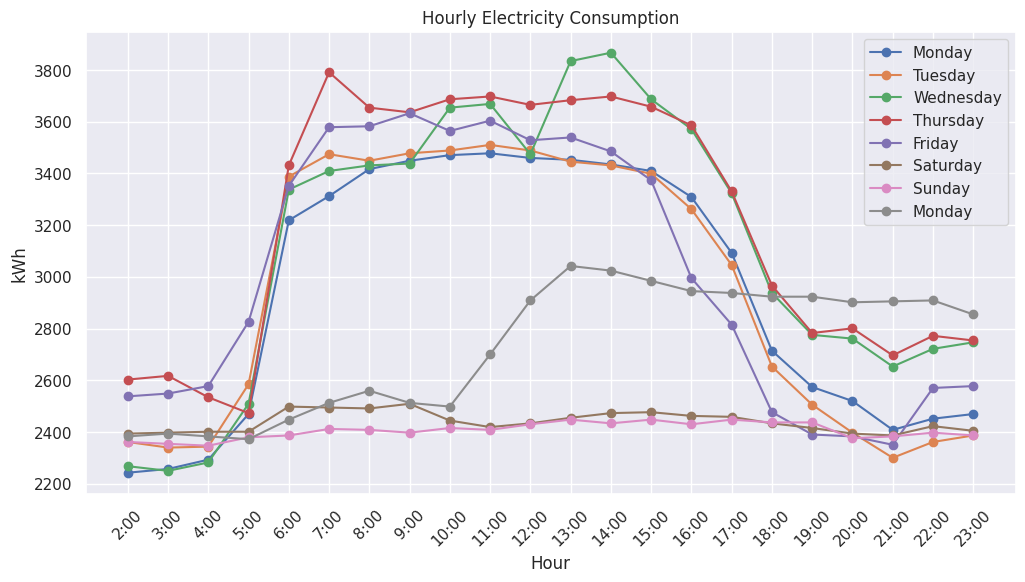

In [54]:
# Set tema visualisasi menggunakan seaborn
sns.set_theme()

# Plot grafik garis untuk setiap kolom waktu
plt.figure(figsize=(12, 6))

# Ambil indeks kolom waktu (mulai dari kolom ke-6)
hours = df_daily.columns[6:]

# Plot data untuk setiap tanggal
for i in range(7, 15):
    # Ambil data untuk satu tanggal
    data = df_daily.iloc[i, 6:]

    # Ambil tanggal dari kolom 'Date'
    date = pd.to_datetime(df_daily['Date'].iloc[i])

    # Plot garis dengan label hari
    plt.plot(hours, data, marker='o', label=date.strftime('%A'))

# Atur label dan judul
plt.xlabel('Hour')
plt.ylabel('kWh')
plt.title('Hourly Electricity Consumption')
plt.legend()
plt.xticks(rotation=45)

# Tampilkan plot
plt.show()

In [55]:
# Melt DataFrame untuk mengubah kolom waktu menjadi baris
df_melted = pd.melt(df_daily, id_vars=['Date', 'year', 'month', 'day'], var_name='Hour', value_name='kWh')

# Tampilkan DataFrame hasil
df_melted

,Date,year,month,day,Hour,kWh
0,2018-01-01,2018.0,1.0,1.0,0:00,2242.8
1,2018-01-02,2018.0,1.0,2.0,0:00,2163.6
2,2018-01-03,2018.0,1.0,3.0,0:00,2635.2
3,2018-01-04,2018.0,1.0,4.0,0:00,2714.4
4,2018-01-05,2018.0,1.0,5.0,0:00,2718.0
...,...,...,...,...,...,...
8755,2018-12-27,2018.0,12.0,27.0,23:00,2991.6
8756,2018-12-28,2018.0,12.0,28.0,23:00,2984.4
8757,2018-12-29,2018.0,12.0,29.0,23:00,2815.2
8758,2018-12-30,2018.0,12.0,30.0,23:00,2779.2


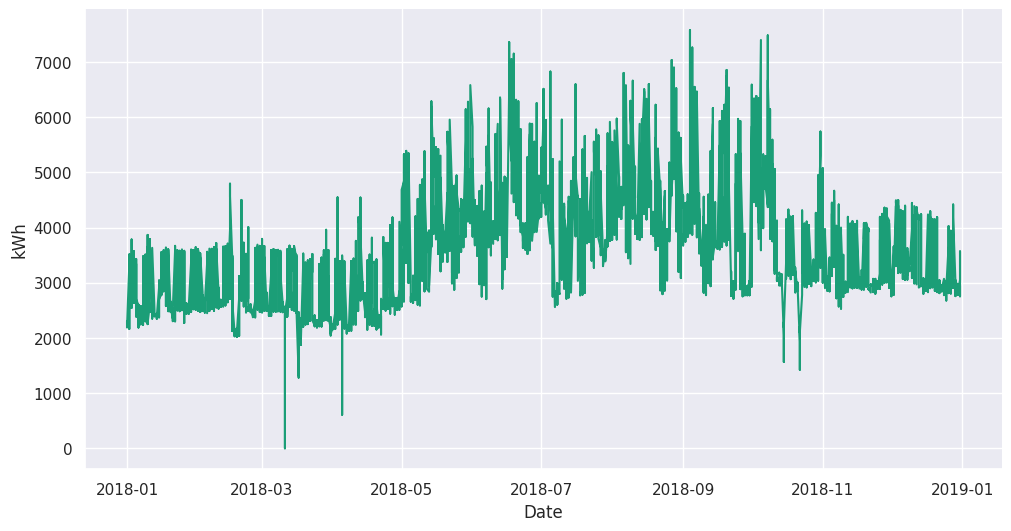

In [56]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['kWh']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_melted.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('kWh')

In [57]:
# Melt DataFrame untuk mengubah kolom waktu menjadi baris
df_melted = pd.melt(df_daily, id_vars=['Date', 'year', 'month', 'day'], var_name='Hour', value_name='kWh')

# Konversi kolom 'Hour' menjadi timedelta
df_melted['Hour'] = pd.to_timedelta(df_melted['Hour'] + ':00')

# Tambahkan kolom 'Date' dan 'Hour' untuk membuat kolom 'Datetime'
df_melted['Datetime'] = pd.to_datetime(df_melted['Date']) + df_melted['Hour']

# Urutkan DataFrame berdasarkan 'Datetime'
df_melted_sorted = df_melted.sort_values(by=['Datetime'])

# Tampilkan DataFrame hasil
df_melted_sorted

,Date,year,month,day,Hour,kWh,Datetime
0,2018-01-01,2018.0,1.0,1.0,0 days 00:00:00,2242.8,2018-01-01 00:00:00
365,2018-01-01,2018.0,1.0,1.0,0 days 01:00:00,2253.6,2018-01-01 01:00:00
730,2018-01-01,2018.0,1.0,1.0,0 days 02:00:00,2242.8,2018-01-01 02:00:00
1095,2018-01-01,2018.0,1.0,1.0,0 days 03:00:00,2206.8,2018-01-01 03:00:00
1460,2018-01-01,2018.0,1.0,1.0,0 days 04:00:00,2192.4,2018-01-01 04:00:00
...,...,...,...,...,...,...,...
7299,2018-12-31,2018.0,12.0,31.0,0 days 19:00:00,3250.8,2018-12-31 19:00:00
7664,2018-12-31,2018.0,12.0,31.0,0 days 20:00:00,3135.6,2018-12-31 20:00:00
8029,2018-12-31,2018.0,12.0,31.0,0 days 21:00:00,3092.4,2018-12-31 21:00:00
8394,2018-12-31,2018.0,12.0,31.0,0 days 22:00:00,2991.6,2018-12-31 22:00:00


Save The Melted Dataset to Session Storage

In [58]:
df_melted_sorted.to_csv('/content/drive/MyDrive/Colab Notebooks/electricity/electricity_melted_sorted.csv', index=False)

# 4 Model Build

## Process Melted Dataset

In [59]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/electricity/electricity_melted_sorted.csv',
                 sep=',', infer_datetime_format=True, index_col='Datetime', header=0)

# Convert the 'Datetime' column to datetime format
df.index = pd.to_datetime(df.index)

# Group by day and aggregate the sum of values
df_agg = df.groupby(df.index.date)['kWh'].sum().reset_index()

# Print the result
print(df_agg)

          index      kWh
0    2018-01-01  53960.4
1    2018-01-02  70574.4
2    2018-01-03  73285.2
3    2018-01-04  73756.8
4    2018-01-05  70923.6
..          ...      ...
360  2018-12-27  81734.4
361  2018-12-28  86580.0
362  2018-12-29  70329.6
363  2018-12-30  69199.2
364  2018-12-31  73569.6

[365 rows x 2 columns]


## Plot the Grouped Data

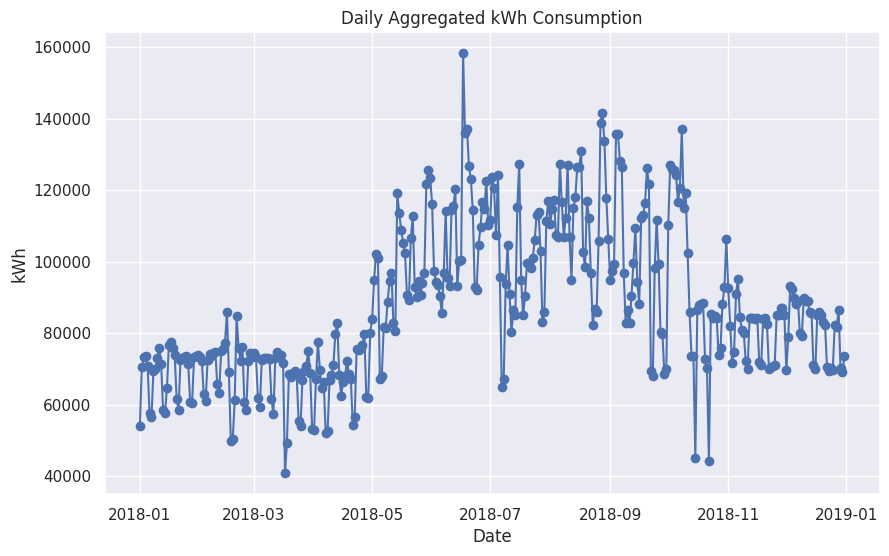

In [60]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_agg['index'], df_agg['kWh'], marker='o', linestyle='-')
plt.title('Daily Aggregated kWh Consumption')
plt.xlabel('Date')
plt.ylabel('kWh')
plt.grid(True)
plt.show()

## Select the kWh Data

In [61]:
# Select relevant columns
data = df_agg[['kWh']]

# Print the result
print(data)

         kWh
0    53960.4
1    70574.4
2    73285.2
3    73756.8
4    70923.6
..       ...
360  81734.4
361  86580.0
362  70329.6
363  69199.2
364  73569.6

[365 rows x 1 columns]


## Normalize The Data

In [133]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

## Create Sequences

In [134]:
# Function to create input sequences and labels
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

In [135]:
BATCH_SIZE = 32
sequence_length = 30

# Create sequences and labels
X, y = create_sequences(data_normalized, sequence_length)

## Splits The Data

In [136]:
split_time = int(len(data) * 0.8)
train_features, train_target = X[:split_time], X[split_time:]
test_features, test_target = y[:split_time], y[split_time:]

In [137]:
# Reshape data for LSTM (samples, time steps, features)
train_features = train_features.reshape((train_features.shape[0], train_features.shape[1], 1))
train_target = train_target.reshape((train_target.shape[0], train_target.shape[1], 1))

## Build The Model

In [129]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(sequence_length, 1)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            16896     
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 dense_9 (Dense)             (None, 20)                1300      
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 51441 (200.94 KB)
Trainable params: 51441 (200.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile the Model

In [130]:
model.compile(optimizer='adam', loss=tf.keras.losses.Huber(), metrics=["mae"])

### Callback Function

In [131]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('mae') < 0.08:
            print('MAE terpenuhi')
            self.model.stop_training = True

### Train the Model

In [138]:
model.fit(train_features, test_features, epochs=300, batch_size=BATCH_SIZE, callbacks=[myCallback()])

Epoch 1/300
10/10 [==============================] - 5s 30ms/step - loss: 0.0508 - mae: 0.2635
Epoch 2/300
10/10 [==============================] - 1s 57ms/step - loss: 0.0146 - mae: 0.1353
Epoch 3/300
10/10 [==============================] - 1s 54ms/step - loss: 0.0114 - mae: 0.1147
Epoch 4/300
10/10 [==============================] - 1s 54ms/step - loss: 0.0105 - mae: 0.1139
Epoch 5/300
10/10 [==============================] - 1s 53ms/step - loss: 0.0097 - mae: 0.1057
Epoch 6/300
10/10 [==============================] - 1s 52ms/step - loss: 0.0105 - mae: 0.1132
Epoch 7/300
10/10 [==============================] - 1s 50ms/step - loss: 0.0091 - mae: 0.1024
Epoch 8/300
10/10 [==============================] - 1s 55ms/step - loss: 0.0100 - mae: 0.1073
Epoch 9/300
10/10 [==============================] - 1s 52ms/step - loss: 0.0092 - mae: 0.1018
Epoch 10/300
10/10 [==============================] - 1s 54ms/step - loss: 0.0095 - mae: 0.1039
Epoch 11/300
10/10 [=============================

### Test the Model

In [139]:
# Make predictions on test data
predictions = model.predict(train_target)

2/2 [==============================] - 1s 13ms/step


In [140]:
# Inverse transform predictions to original scale
predictions = scaler.inverse_transform(predictions)
test_target_inverse = scaler.inverse_transform(test_target)

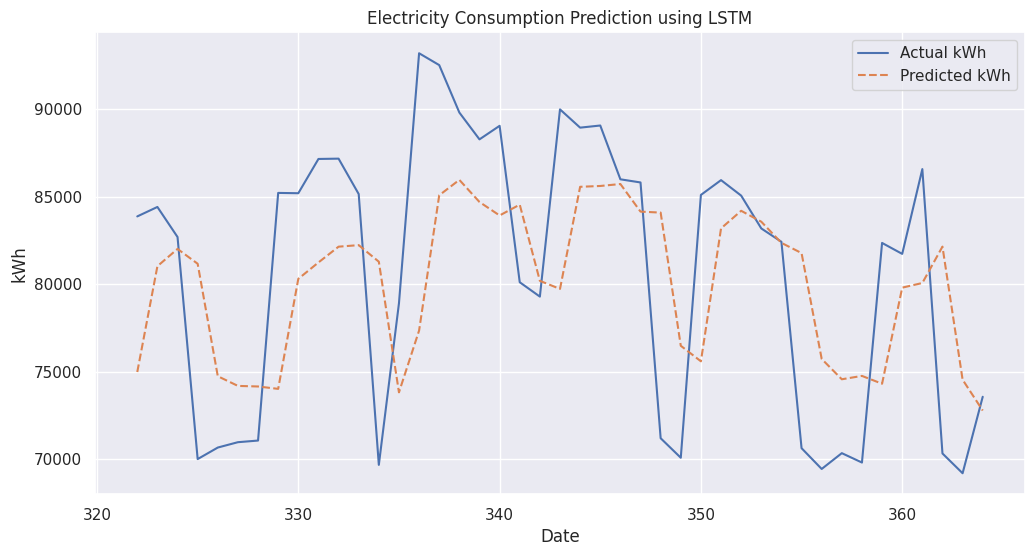

In [141]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df_agg.index[split_time+sequence_length:], test_target_inverse, label='Actual kWh')
plt.plot(df_agg.index[split_time+sequence_length:], predictions, label='Predicted kWh', linestyle='dashed')
plt.title('Electricity Consumption Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('kWh')
plt.legend()
plt.show()

In [142]:
# Create DataFrame for actual and predicted values
df_results = pd.DataFrame({'Actual kWh': test_target_inverse.flatten(), 'Predicted kWh': predictions.flatten()})

In [143]:
# Display the results
print(df_results)

    Actual kWh  Predicted kWh
0      83876.4   74983.921875
1      84416.4   81031.062500
2      82699.2   82018.117188
3      70009.2   81170.539062
4      70668.0   74744.351562
5      70974.0   74190.460938
6      71067.6   74157.570312
7      85219.2   74021.070312
8      85201.2   80309.789062
9      87159.6   81244.851562
10     87177.6   82146.953125
11     85154.4   82235.273438
12     69678.0   81287.875000
13     78912.0   73822.953125
14     93200.4   77352.750000
15     92523.6   85084.781250
16     89812.8   85964.468750
17     88279.2   84700.242188
18     89053.2   83930.414062
19     80114.4   84549.664062
20     79293.6   80194.789062
21     89992.8   79732.664062
22     88948.8   85568.265625
23     89071.2   85615.492188
24     85996.8   85727.078125
25     85816.8   84149.960938
26     71200.8   84094.281250
27     70084.8   76484.296875
28     85104.0   75596.210938
29     85950.0   83191.648438
30     85064.4   84197.554688
31     83188.8   83573.554688
32     824

## Test on Random Data

In [165]:
# Set a seed for reproducibility
np.random.seed(42)

# Generate 30 random data points between 75000 and 90000
random_data = np.random.uniform(75000, 90000, 30)

# Normalize the Data
random_data = random_data.reshape(-1,1)
random_data_normalized = scaler.fit_transform(random_data)

# Print the generated data
print(random_data_normalized)

[[0.37284965]
 [0.9797798 ]
 [0.74938422]
 [0.60893137]
 [0.14266357]
 [0.14263816]
 [0.03950081]
 [0.89072903]
 [0.61151903]
 [0.72418595]
 [0.        ]
 [1.        ]
 [0.85519484]
 [0.20199041]
 [0.16984743]
 [0.17151129]
 [0.2987993 ]
 [0.53108445]
 [0.4333188 ]
 [0.28509156]
 [0.62283009]
 [0.12525671]
 [0.28605594]
 [0.36423482]
 [0.45873155]
 [0.80540508]
 [0.18864901]
 [0.5200008 ]
 [0.60235416]
 [0.02724663]]


In [172]:
# Create sequences and labels
X, y = create_sequences(random_data_normalized, 1)

In [191]:
# Make predictions on each point in the sequence
predictions = model.predict(X)

1/1 [==============================] - 0s 33ms/step


In [193]:
# Inverse to Normal Scale
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Print the predicted data
print("\nPredicted Data:")
print(predictions)

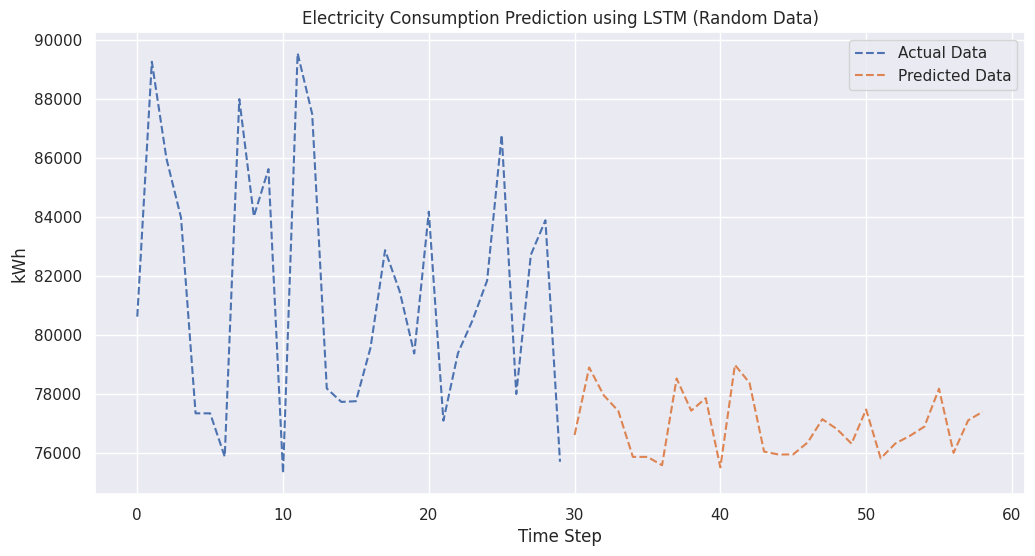

In [197]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(random_data)), scaler.inverse_transform(random_data_normalized), label='Actual Data', linestyle='dashed')
plt.plot(np.arange(len(random_data), len(random_data) + len(predictions)), predictions, label='Predicted Data', linestyle='dashed')
plt.title('Electricity Consumption Prediction using LSTM (Random Data)')
plt.xlabel('Time Step')
plt.ylabel('kWh')
plt.legend()
plt.show()

# 5 Generate Save Model

## Save the Model

In [198]:
run_model = tf.function(lambda x: model(x))
# This is important, let's fix the input size.
STEPS = 1
INPUT_SIZE = 30
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([STEPS, INPUT_SIZE], model.inputs[0].dtype))

# model directory.
MODEL_DIR = "model_kWh_2"
model.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()

## Convert the Model to TFLITE

In [201]:
import pathlib
tflite_model_file = pathlib.Path('model_kWh_2.tflite')
tflite_model_file.write_bytes(tflite_model)

212236